### Business goal:

Build a logistic regression model that would help in predicting the defaulters.

In [2]:
import pandas as pd
raw_df = pd.read_excel("D:\Business Analytics\Important files\Logistical regression\Risk classification\ClassifyRiskData.xlsx")

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mortgage        246 non-null    object
 1   loans           246 non-null    int64 
 2   age             246 non-null    int64 
 3   marital_status  246 non-null    object
 4   income          246 non-null    int64 
 5   risk            246 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 11.7+ KB


In [4]:
raw_df.head(3)

,mortgage,loans,age,marital_status,income,risk
0,y,3,34,other,28061,1
1,n,2,37,other,28009,1
2,n,2,29,other,27615,1


In [5]:
##---------------------------------------
## Identify the Class label or Y variable
##---------------------------------------
Y = raw_df.risk.astype('category')
print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 246 entries, 0 to 245
Series name: risk
Non-Null Count  Dtype   
--------------  -----   
246 non-null    category
dtypes: category(1)
memory usage: 502.0 bytes
None


In [6]:
raw_df.risk

0      1
1      1
2      1
3      1
4      1
      ..
241    0
242    0
243    0
244    0
245    0
Name: risk, Length: 246, dtype: int64

In [23]:
##-----------------------------
## Select the Predictor Variables into list called X_features
##------------------------------
X_features = list(raw_df.columns)
# risk is the outcome or Y variable in this step , we are identifying the X variables
X_features.remove('risk')

In [25]:
print(X_features)

['mortgage', 'loans', 'age', 'marital_status', 'income']


In [9]:
##--------------------------------------
## Set up a dataframe with only X-variables
##--------------------------------------
X = raw_df[X_features]

In [10]:
X

,mortgage,loans,age,marital_status,income
0,y,3,34,other,28061
1,n,2,37,other,28009
2,n,2,29,other,27615
3,y,2,33,other,27287
4,y,2,39,other,26954
...,...,...,...,...,...
241,y,0,51,married,46810
242,y,0,55,married,45710
243,y,0,51,married,44896
244,y,0,54,married,44302


In [27]:
##----------------------------------
## Split the Data into Training nd Test
## test size=0.3 indictaes 70% training and
## 30% test data
##-----------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                            Y,
                                            test_size = 0.3,
                                            random_state = 500)
print(y_train.info())
## All data processing should be done after split to prevent leakage

<class 'pandas.core.series.Series'>
Index: 172 entries, 70 to 90
Series name: risk
Non-Null Count  Dtype   
--------------  -----   
172 non-null    category
dtypes: category(1)
memory usage: 1.6 KB
None


In [29]:
X_train.head(3)

,mortgage,loans,age,marital_status,income
70,y,2,25,other,23580
162,n,1,66,married,42120
163,y,1,56,married,51684


In [31]:
##---------------------------------------
## Pre-process X-vars
##---------------------------------------

##---------------------------------------
## 1. Identify and dummy code (one-hot encoding) the categorical column
##---------------------------------------
# List of categorical columns
categorical_columns = ['mortgage','marital_status']
X_train_encoded = pd.get_dummies(X_train,columns = categorical_columns, drop_first = True, dtype=int)
X_test_encoded = pd.get_dummies(X_test,columns = categorical_columns, drop_first = True, dtype=int)

In [33]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 70 to 90
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   loans                  172 non-null    int64
 1   age                    172 non-null    int64
 2   income                 172 non-null    int64
 3   mortgage_y             172 non-null    int32
 4   marital_status_other   172 non-null    int32
 5   marital_status_single  172 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 7.4 KB


In [39]:
X_train_encoded.head()

,loans,age,income,mortgage_y,marital_status_other,marital_status_single
70,2,25,23580,1,1,0
162,1,66,42120,0,0,0
163,1,56,51684,1,0,0
236,0,44,50793,1,0,0
1,2,37,28009,0,1,0


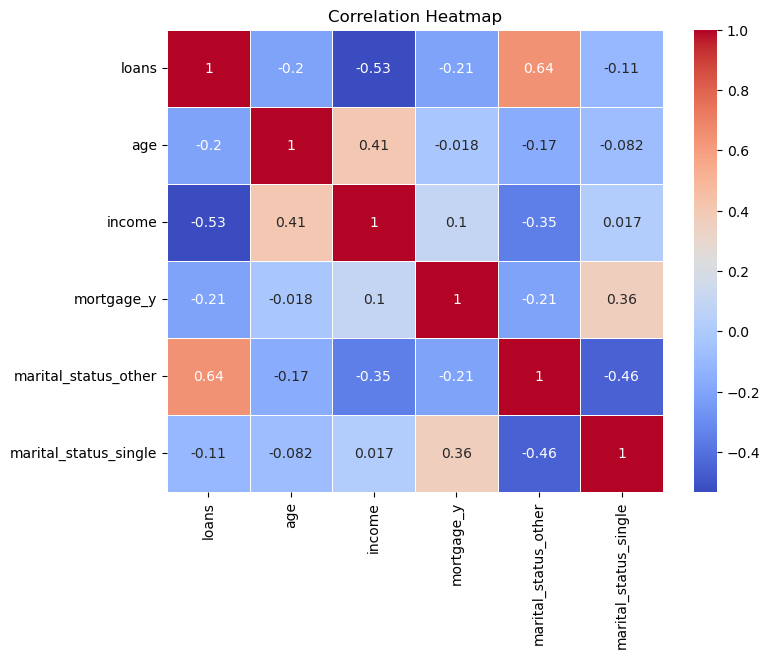

In [41]:
##-----------------------------------------
## 2. Identify and remove highly correlated columns
##-----------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only = True)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth = 0.5)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
corr_matrix

,loans,age,income,mortgage_y,marital_status_other,marital_status_single
loans,1.000000,-0.203874,-0.532394,-0.205079,0.640863,-0.105475
age,-0.203874,1.000000,0.409710,-0.017794,-0.166173,-0.081907
income,-0.532394,0.409710,1.000000,0.100793,-0.350348,0.017211
mortgage_y,-0.205079,-0.017794,0.100793,1.000000,-0.205966,0.359534
marital_status_other,0.640863,-0.166173,-0.350348,-0.205966,1.000000,-0.459697
marital_status_single,-0.105475,-0.081907,0.017211,0.359534,-0.459697,1.000000


In [45]:
##---------------------------------
## Build the logit model
##---------------------------------
import statsmodels.api as sm
## Constant is to be added when using the sm library
X_train_encoded = sm.add_constant (X_train_encoded)
# Call logistic regression with X and Y variables of the training data
# Model is built with the taining data
logit = sm.Logit(y_train, X_train_encoded)
## Fir the model and display results
logit_model = logit.fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.152237
         Iterations 9
                           Results: Logit
Model:                Logit             Method:            MLE       
Dependent Variable:   risk              Pseudo R-squared:  0.780     
Date:                 2024-10-07 09:03  AIC:               66.3695   
No. Observations:     172               BIC:               88.4020   
Df Model:             6                 Log-Likelihood:    -26.185   
Df Residuals:         165               LL-Null:           -119.21   
Converged:            1.0000            LLR p-value:       1.7591e-37
No. Iterations:       9.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 19.6403   4.1681  4.7121 0.0000 11.4710 27.8095
loans           

In [47]:
#Only significant X-vars are used to build the predictive model
#All variables are significant

In [49]:
##---------------------------------
## Apply model on test data
##---------------------------------
X_test_encoded = sm.add_constant(X_test_encoded)
y_prob = logit_model.predict(X_test_encoded)
# y_prob holds the probability values for each record in the test data

In [51]:
y_prob

61     0.999376
124    0.097099
220    0.003061
224    0.002738
55     0.984251
         ...   
66     0.999942
154    0.018371
80     0.999871
28     0.998858
230    0.954197
Length: 74, dtype: float64

In [53]:
y_pred_df = pd.DataFrame({"actual_Y":y_test,
                          "predicted_prob":y_prob})

In [55]:
print(y_pred_df.head())

    actual_Y  predicted_prob
61         1        0.999376
124        0        0.097099
220        0        0.003061
224        0        0.002738
55         1        0.984251


In [57]:
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
    lambda x: 1 if x>=0.5 else 0)
print(y_pred_df.head())

    actual_Y  predicted_prob  predicted_Y
61         1        0.999376            1
124        0        0.097099            0
220        0        0.003061            0
224        0        0.002738            0
55         1        0.984251            1


In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[36  2]
 [ 3 33]]


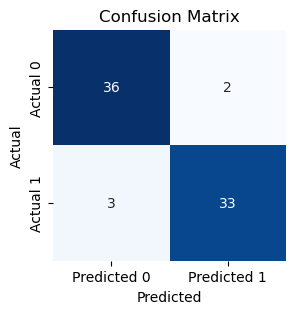

In [61]:
plt.figure(figsize= (3,3))
sns.heatmap(cm,annot = True, fmt = 'd', cmap = 'Blues', cbar =False,
            xticklabels = ['Predicted 0', 'Predicted 1'],
            yticklabels = ['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [63]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])

print(f"Sensitivity (Recall):{sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall):0.92
Accuracy: 0.93


In [65]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        38
           1       0.94      0.92      0.93        36

    accuracy                           0.93        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74



### Implications/Reccomendations

93% Accuracy 92% sensitivity 95% specificity

92% credit rarting => Accept the model at this threshold of 0.5

Good model -> good accuracy, good sensitivity

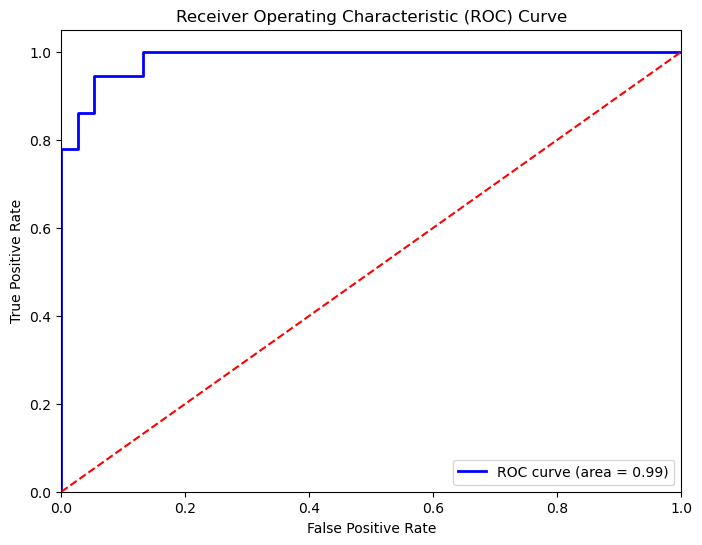

In [70]:
# Plot ROC curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()